# SC1015 Mini Project

In [105]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.stats import zscore


In [127]:
df = pd.read_csv('new_df.csv') #cleaned dataset
df

,Unnamed: 0,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,overview,poster_path,genres,release_year,num_chars
0,0,27205,Inception,8.364,34495,2010-07-15,825532764,148,False,160000000,en,"Cobb, a skilled thief who commits corporate es...",/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"Action, Science Fiction, Adventure",2010,9
1,1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,False,165000000,en,The adventures of a group of explorers who mak...,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"Adventure, Drama, Science Fiction",2014,12
2,2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,185000000,en,Batman raises the stakes in his war on crime. ...,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"Drama, Action, Crime, Thriller",2008,15
3,3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,en,"In the 22nd century, a paraplegic Marine is di...",/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Action, Adventure, Fantasy, Science Fiction",2009,6
4,4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,220000000,en,When an unexpected enemy emerges and threatens...,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"Science Fiction, Action, Adventure",2012,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,344438,1192676,"Dracula, The Monster",10.000,1,2023-10-10,200,23,False,1300,en,In this unique interpretation on Bram Stoker's...,/aQP5QwoCBODA6ssH7DCVcGkdh0w.jpg,"Horror, Drama",2023,20
10099,345118,381888,Mr. Unbelievable,6.000,1,2015-12-03,398179,94,False,711035,zh,Mr Unbelievable tells the story of Eric Kwek H...,/mS6SMJOwFu7w2XSTMQQM5RYl3hQ.jpg,"Comedy, Music",2015,16
10100,345290,1239092,The Tickle Monster,10.000,1,2023-10-20,1,10,False,1,en,Alex tries to save his missing friends from a ...,/fBSnU4keVRl008WD4oRV6jjJUUp.jpg,"Horror, Crime",2023,18
10101,346019,285960,Coffee Please,6.500,1,2013-10-17,800000,105,False,800000,th,A man who wants to become a barrister falls fo...,/wVetKK1NjrTqioV6MuHyeyDntqh.jpg,"Romance, Drama",2013,13


## Analysis of Movie Overview Descriptions using TFIDF

In [107]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(overview_text):
    tokens = word_tokenize(overview_text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_overview = ' '.join(filtered_tokens)
    return filtered_overview

# Create a new column 'filtered_overviews' with the stopwords removed
df['filtered_overviews'] = df['overview'].apply(remove_stopwords)

# Print the first few rows of the 'filtered_overviews' column
print(df['filtered_overviews'])

0        cobb , skilled thief commits corporate espiona...
1        adventures group explorers make use newly disc...
2        batman raises stakes war crime . help lt. jim ...
3        22nd century , paraplegic marine dispatched mo...
4        unexpected enemy emerges threatens global safe...
                               ...                        
10098    unique interpretation bram stoker 's `` dracul...
10099    mr unbelievable tells story eric kwek hock sen...
10100    alex tries save missing friends paranormal tic...
10101    man wants become barrister falls architect , a...
10102                woman revelatory dream death father .
Name: filtered_overviews, Length: 10103, dtype: object



TF-IDF Matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.34433388 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


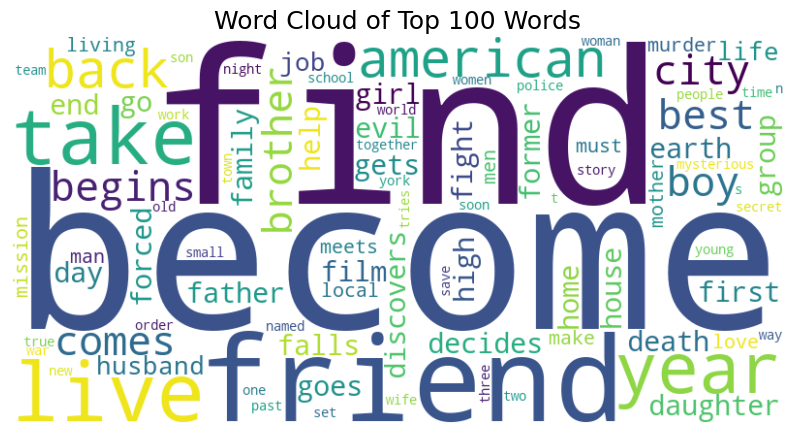


TF-IDF Feature Names (Words):
['also' 'american' 'back' 'become' 'becomes' 'begins' 'best' 'boy'
 'brother' 'city' 'comes' 'daughter' 'day' 'death' 'decides' 'discovers'
 'earth' 'end' 'evil' 'falls' 'family' 'father' 'fight' 'film' 'find'
 'finds' 'first' 'forced' 'former' 'friend' 'friends' 'get' 'gets' 'girl'
 'go' 'goes' 'group' 'help' 'high' 'home' 'house' 'however' 'husband'
 'job' 'life' 'live' 'lives' 'living' 'local' 'love' 'make' 'man' 'meets'
 'men' 'mission' 'mother' 'murder' 'must' 'mysterious' 'n' 'named' 'new'
 'night' 'old' 'one' 'order' 'past' 'people' 'police' 's' 'save' 'school'
 'secret' 'set' 'small' 'son' 'soon' 'story' 't' 'take' 'takes' 'team'
 'three' 'time' 'together' 'town' 'tries' 'true' 'two' 'war' 'way' 'wife'
 'woman' 'women' 'work' 'world' 'year' 'years' 'york' 'young']
10103


In [108]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
#import nltk
#from nltk.corpus import stopwords
#nltk.download('punkt')

# Assuming the column containing overviews is named 'overview'


# TF-IDF model(need a larger number of features and a better sample of the population)
tfidf_vectorizer = TfidfVectorizer(max_features=100,token_pattern=r'[a-zA-Z]+')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['filtered_overviews'])

# Print the TF-IDF matrix
print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())


# Get the feature names (words) for TF-IDF
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_scores = tfidf_matrix.max(axis=0).toarray()[0]
word_scores = dict(zip(tfidf_feature_names, tfidf_scores))

# Sort the dictionary by TF-IDF scores in descending order
sorted_word_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

# Create a string of the top 50 words
top_words = ' '.join([word for word, score in sorted_word_scores[:100]])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_words)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 100 Words', fontsize=18)
plt.show()

print("\nTF-IDF Feature Names (Words):")
print(tfidf_feature_names)

num_rows = tfidf_matrix.shape[0]
print(num_rows)

In [109]:
def compute_avg_tfidf(row):
    tokens = word_tokenize(row['filtered_overviews'])
    tfidf_scores = tfidf_matrix[row.name].toarray()[0]
    avg_tfidf_score = sum(tfidf_scores) / len(tokens)
    return avg_tfidf_score

df['avg_tfidf_score'] = df.apply(compute_avg_tfidf, axis=1)

# Print the updated DataFrame
print("\nDataFrame with Average TF-IDF Scores:")
print(df[['filtered_overviews', 'avg_tfidf_score']].head())


DataFrame with Average TF-IDF Scores:
                                  filtered_overviews  avg_tfidf_score
0  cobb , skilled thief commits corporate espiona...         0.051992
1  adventures group explorers make use newly disc...         0.070706
2  batman raises stakes war crime . help lt. jim ...         0.046428
3  22nd century , paraplegic marine dispatched mo...         0.074198
4  unexpected enemy emerges threatens global safe...         0.066531


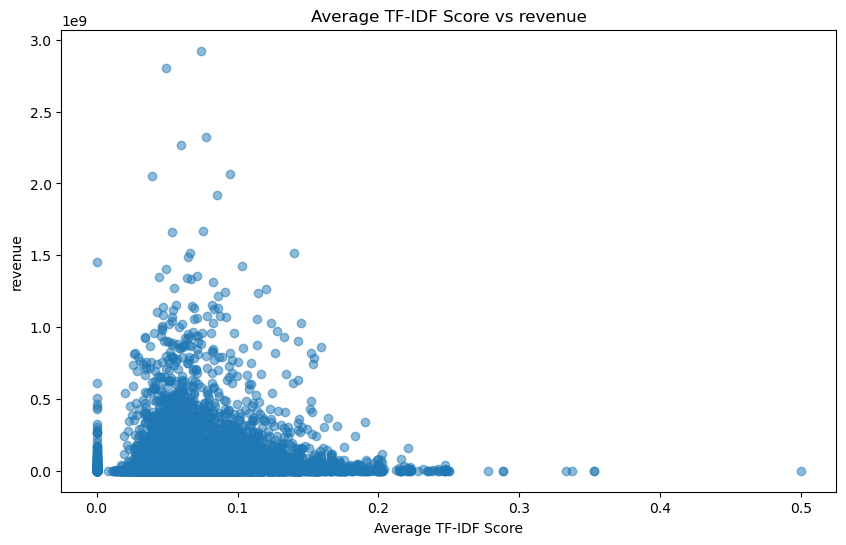

In [110]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
avg_tfidf=df['avg_tfidf_score'].values[:10000]
rev=df['revenue'].values[:10000]
plt.scatter(avg_tfidf, rev, alpha=0.5)

# Add labels and title
plt.xlabel('Average TF-IDF Score')
plt.ylabel('revenue')
plt.title('Average TF-IDF Score vs revenue')

# Display the plot
plt.show()

<Axes: >

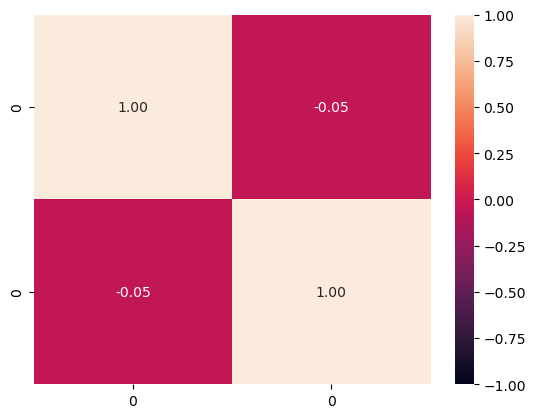

In [111]:
avg_tfidf_score_df = pd.DataFrame(avg_tfidf)

rev_df = pd.DataFrame(rev)

jointDF = pd.concat([avg_tfidf_score_df, rev_df], axis = 1).reindex(rev_df.index)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Through the low linear correlation value of -0.05, overview (movie description) has negligible impact on revenue. 

## Original Language Analysis

In [113]:
#original language
num_categories = df['original_language'].nunique()

print(f"Number of categories in 'original_language': {num_categories}")


Number of categories in 'original_language': 64


In [115]:
print(df["original_language"].value_counts())


original_language
en    7840
hi     314
fr     290
ru     204
es     187
      ... 
iu       1
ku       1
la       1
nb       1
ab       1
Name: count, Length: 64, dtype: int64


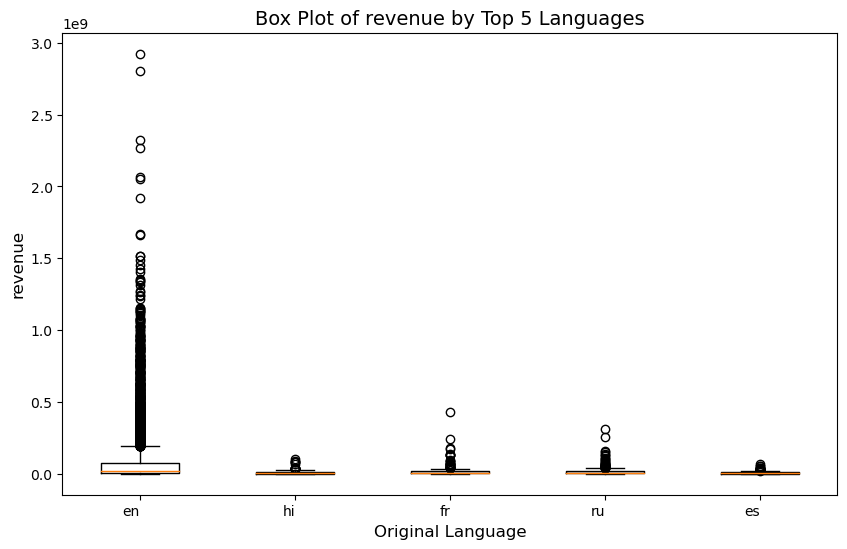

,original_language,revenue
0,en,825532764
1,en,701729206
2,en,1004558444
3,en,2923706026
4,en,1518815515
...,...,...
10096,fr,1493
10097,en,1
10098,en,200
10100,en,1


In [116]:
data = df[['original_language', 'revenue']]

# Get the top 5 most popular languages
top_languages = data['original_language'].value_counts().head(5).index

# Filter the data for the top 5 languages
top_data = data[data['original_language'].isin(top_languages)]


fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(top_data.groupby('original_language')['revenue'].apply(list))
ax.set_xlabel('Original Language', fontsize=12)
ax.set_ylabel('revenue', fontsize=12)
ax.set_title('Box Plot of revenue by Top 5 Languages', fontsize=14)
ax.set_xticklabels(top_languages, rotation=0, ha='right')
plt.show()



In [117]:

data = df[['original_language', 'revenue']]

# Get the top 5 most popular languages
top_languages = data['original_language'].value_counts().head(5).index

# Filter the data for the top 5 languages
top_data = data[data['original_language'].isin(top_languages)]
outlier_counts = {}

for lang in top_languages:
    lang_data = top_data[top_data['original_language'] == lang]['revenue']
    z_scores = zscore(lang_data)
    outlier_mask = (z_scores > 3) | (z_scores < -3)# Adjust the threshold as needed
    num_outliers = sum(outlier_mask)
    outlier_counts[lang] = num_outliers
    top_data.loc[top_data['original_language'] == lang, 'revenue'] = lang_data[~outlier_mask]
    
    
top_data = top_data.dropna(subset=['revenue'])
for lang, count in outlier_counts.items():
    print(f"Number of outliers for {lang}: {count}")
   

    

Number of outliers for en: 178
Number of outliers for hi: 7
Number of outliers for fr: 7
Number of outliers for ru: 4
Number of outliers for es: 6


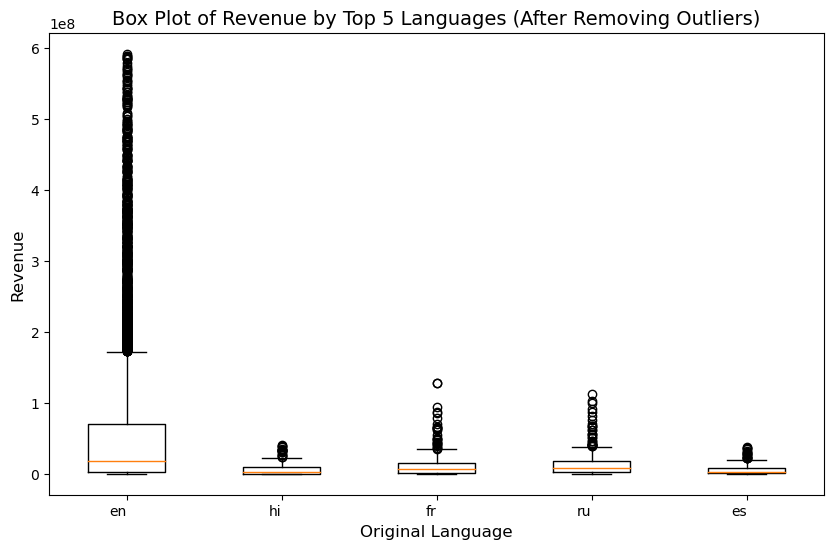

In [118]:


# Plot the box plot after removing outliers
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(top_data.groupby('original_language')['revenue'].apply(list))
ax.set_xlabel('Original Language', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
ax.set_title('Box Plot of Revenue by Top 5 Languages (After Removing Outliers)', fontsize=14)
ax.set_xticklabels(top_languages, rotation=0, ha='right')
plt.show()

Langauge does not have much effect on the revenue as the languages are distributed around the relatively lower revenue portion, except for English language. 

In [128]:
genres_list = df['genres'].str.replace(' ', '') # Remove spaces
num_genres = genres_list.apply(len)
df['genres'] = genres_list
df['num_genres'] = num_genres

all_genres = set(genre for genres in df['genres'].str.split(',') for genre in genres)

existing_columns = set(df.columns)
genre_columns = ['genre_' + genre for genre in all_genres if 'genre_' + genre not in existing_columns]

df = df.reindex(columns=df.columns.tolist() + genre_columns, fill_value=0)

for idx, row in df.iterrows():
    genres = row['genres'].split(',')
    for genre in genres:
        if 'genre_' + genre in df.columns:
            df.at[idx, 'genre_' + genre] = 1

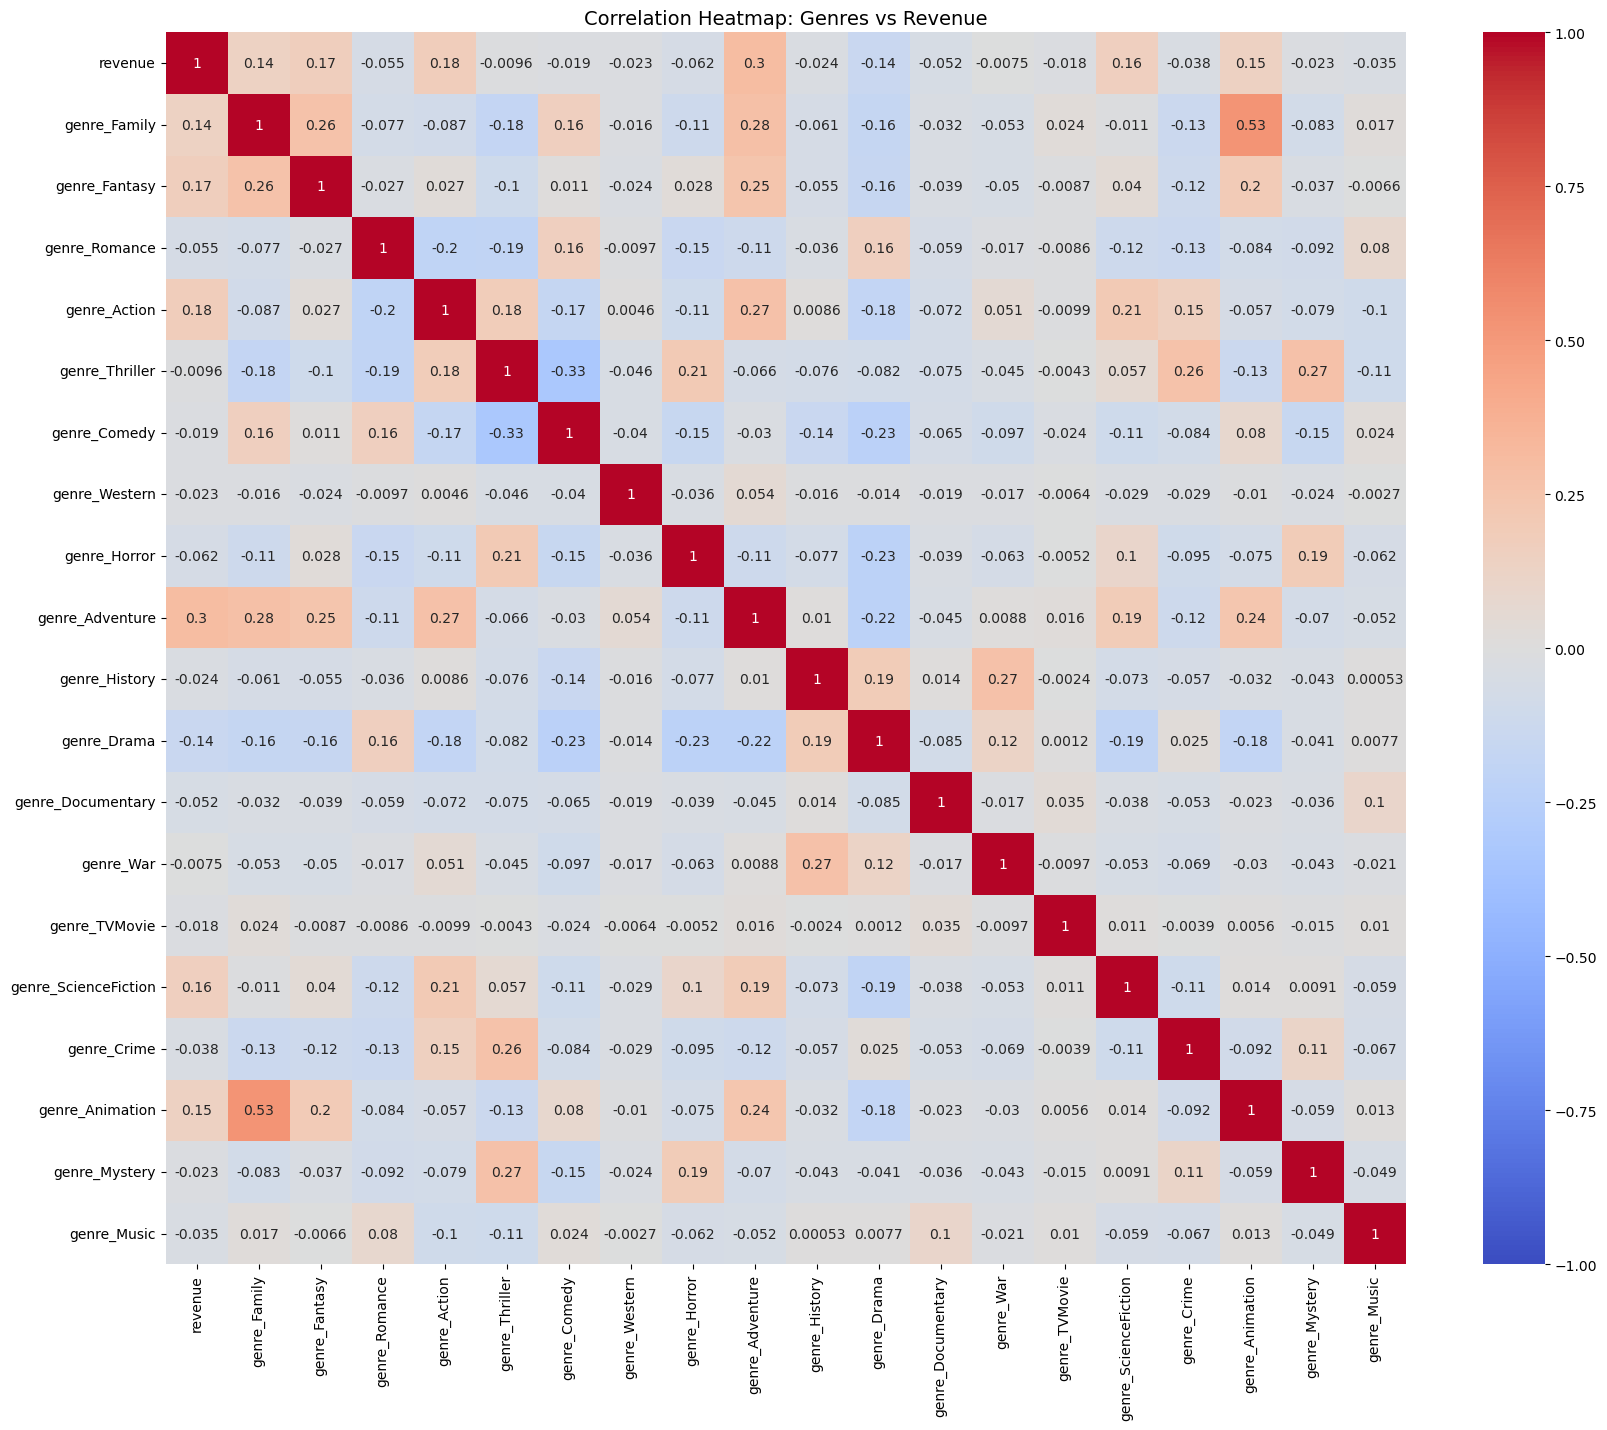

In [129]:
# Get the list of genre columns
df1 = pd.DataFrame()

for col in df.columns:
    col=str(col)
    if col.startswith('genre_') or col=="revenue":
        df1[col]=df[col]

# Assuming you have a DataFrame 'df' with columns 'vote_average' and genre columns

# Calculate the correlation matrix
corr_matrix = df1.corr(method='pearson')

# Extract the correlation values between genre columns and 'vote_average'


# Create a heatmap
plt.figure(figsize=(20, 16))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Genres vs Revenue', fontsize=14)
plt.show()

As seen in the correlation heatmap, there is very low correlation between genre and movie revenue, with highest correlation of 0.3 between the genre 'Adventure' and revenue. 

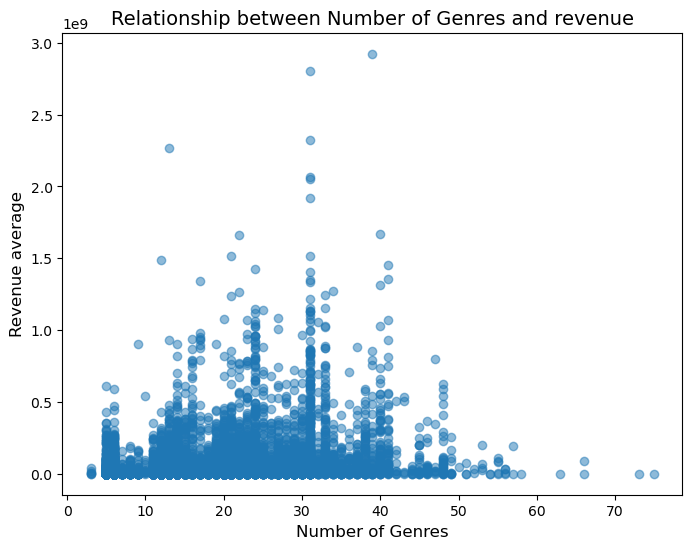

<Axes: >

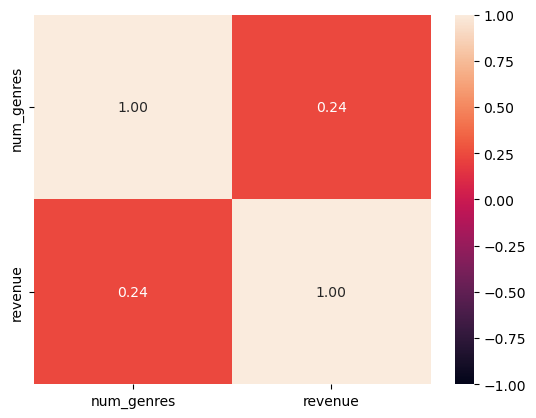

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(df['num_genres'], df['revenue'], alpha=0.5)
plt.xlabel('Number of Genres', fontsize=12)
plt.ylabel('Revenue average', fontsize=12)
plt.title('Relationship between Number of Genres and revenue', fontsize=14)
plt.show()

jointDF = pd.concat([df['num_genres'], df['revenue']], axis = 1)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [131]:

z_scores = zscore(df['num_genres'])


threshold = 3

outlier_mask = (z_scores > threshold) | (z_scores < -threshold)

df1= df[~outlier_mask]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10103 entries, 0 to 10102
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10103 non-null  int64  
 1   id                    10103 non-null  int64  
 2   title                 10103 non-null  object 
 3   vote_average          10103 non-null  float64
 4   vote_count            10103 non-null  int64  
 5   release_date          10103 non-null  object 
 6   revenue               10103 non-null  int64  
 7   runtime               10103 non-null  int64  
 8   adult                 10103 non-null  bool   
 9   budget                10103 non-null  int64  
 10  original_language     10103 non-null  object 
 11  overview              10103 non-null  object 
 12  poster_path           10103 non-null  object 
 13  genres                10103 non-null  object 
 14  release_year          10103 non-null  int64  
 15  num_chars          

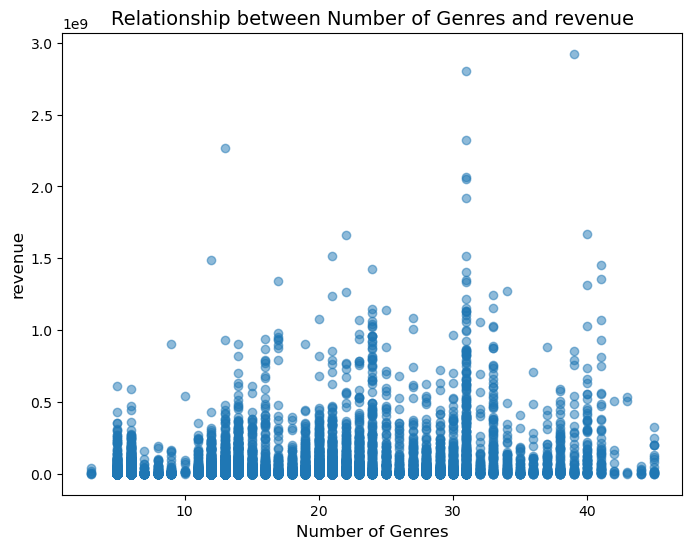

<Axes: >

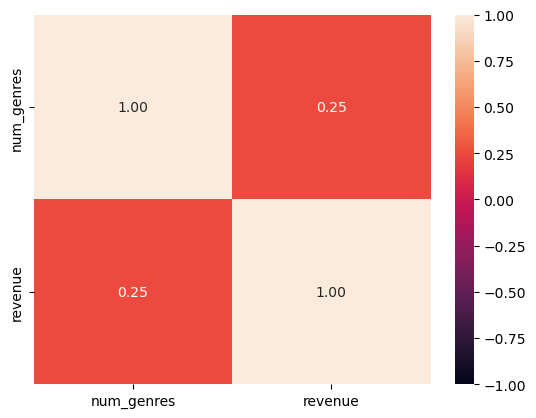

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['num_genres'], df1['revenue'], alpha=0.5)
plt.xlabel('Number of Genres', fontsize=12)
plt.ylabel('revenue', fontsize=12)
plt.title('Relationship between Number of Genres and revenue', fontsize=14)
plt.show()

jointDF = pd.concat([df1['num_genres'], df1['revenue']], axis = 1)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Low correlation between number of genres and revenue. Also should not be used since, without the outliers, the number of available datapoints are reduced significantly. 

In [134]:
genres_df = pd.DataFrame()
for col in df.columns:
    if col.startswith('genre_'):
        jdf = pd.concat([df[col], df['revenue']], axis = 1)
        jdf = jdf[jdf[col] != 0]
        genre_average = jdf['revenue'].mean()
        print()
        print(col)
        print(genre_average)



genre_Family
131028594.78024194

genre_Fantasy
150196463.88546255

genre_Romance
48134005.74814815

genre_Action
114083626.95922486

genre_Thriller
63235210.04021785

genre_Comedy
61962713.636820085

genre_Western
38684160.878787875

genre_Horror
38883273.851528384

genre_Adventure
173204118.75584257

genre_History
50016844.34502924

genre_Drama
41903790.14554686

genre_Documentary
10184964.933333334

genre_War
59919960.36065574

genre_TVMovie
8520265.36

genre_ScienceFiction
142643003.17262512

genre_Crime
51792025.94574682

genre_Animation
160651904.01457193

genre_Mystery
53945146.16125151

genre_Music
39336415.83863081


Genres: 'Adventure' and 'Animation' yield the highest revenue on average. 

In [135]:
df.to_csv('NN_df.csv')

In [2]:
df = pd.read_csv('NN_df.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,...,genre_Music,genre_Mystery,genre_Action,genre_Animation,genre_Documentary,genre_TVMovie,genre_Western,genre_Romance,genre_Family,genre_War
0,0,0,27205,Inception,8.364,34495,2010-07-15,825532764,148,False,...,0,0,1,0,0,0,0,0,0,0
1,1,1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,False,...,0,0,0,0,0,0,0,0,0,0
2,2,2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,...,0,0,1,0,0,0,0,0,0,0
3,4,4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,...,0,0,1,0,0,0,0,0,0,0
4,5,5,293660,Deadpool,7.606,28894,2016-02-09,783100000,108,False,...,0,0,1,0,0,0,0,0,0,0


In [3]:
# Assuming your DataFrame is called 'df'
one_hot = pd.get_dummies(df['adult'], drop_first=False)
one_hot = one_hot.rename(columns={0: 'adult_False', 1: 'adult_True'})
df = df.join(one_hot)
df.drop('adult', axis=1, inplace=True)

# Convert "True" to 1 and "False" to 0
df['adult_False'] = df['adult_False'].replace({True: 1, False: 0})
df['adult_True'] = df['adult_True'].replace({True: 1, False: 0})

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,...,genre_Action,genre_Animation,genre_Documentary,genre_TVMovie,genre_Western,genre_Romance,genre_Family,genre_War,adult_False,adult_True
0,0,0,27205,Inception,8.364,34495,2010-07-15,825532764,148,160000000,...,1,0,0,0,0,0,0,0,1,0
1,1,1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,...,0,0,0,0,0,0,0,0,1,0
2,2,2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,...,1,0,0,0,0,0,0,0,1,0
3,4,4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,...,1,0,0,0,0,0,0,0,1,0
4,5,5,293660,Deadpool,7.606,28894,2016-02-09,783100000,108,58000000,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,238427,345118,381888,Mr. Unbelievable,6.000,1,2015-12-03,398179,94,711035,...,0,0,0,0,0,0,0,0,1,0
9421,238508,345290,1239092,The Tickle Monster,10.000,1,2023-10-20,1,10,1,...,0,0,0,0,0,0,0,0,1,0
9422,238806,346019,285960,Coffee Please,6.500,1,2013-10-17,800000,105,800000,...,0,0,0,0,0,1,0,0,1,0
9423,239048,346574,1262415,Making Bacon Fest,10.000,1,2024-03-19,400,0,20,...,0,0,1,0,0,0,0,0,1,0


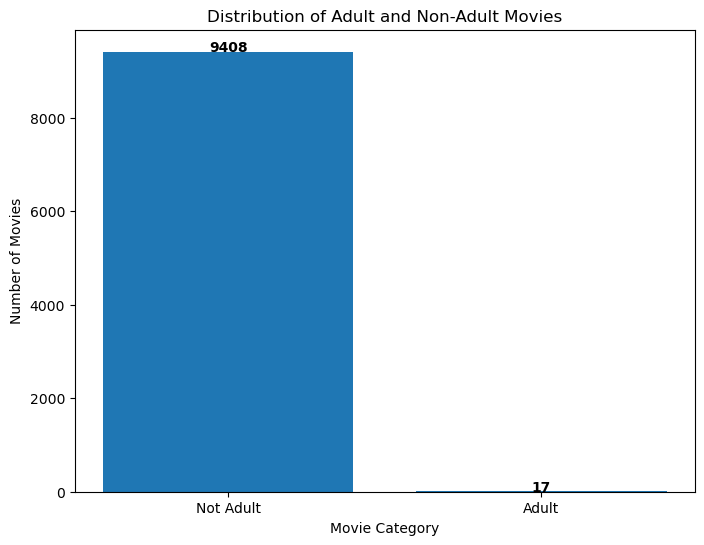

In [11]:


# Count the number of movies with 'adult_False' == 1 and 'adult_True' == 1
adult_false_count = df['adult_False'].sum()
adult_true_count = df['adult_True'].sum()

# Create a bar plot
categories = ['Not Adult', 'Adult']
values = [adult_false_count, adult_true_count]

plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.xlabel('Movie Category')
plt.ylabel('Number of Movies')
plt.title('Distribution of Adult and Non-Adult Movies')

# Add value labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(v), color='black', fontweight='bold', ha='center')

plt.show()

Text(0.5, 1.0, 'Average Revenue of Adult and Non-Adult Movies')

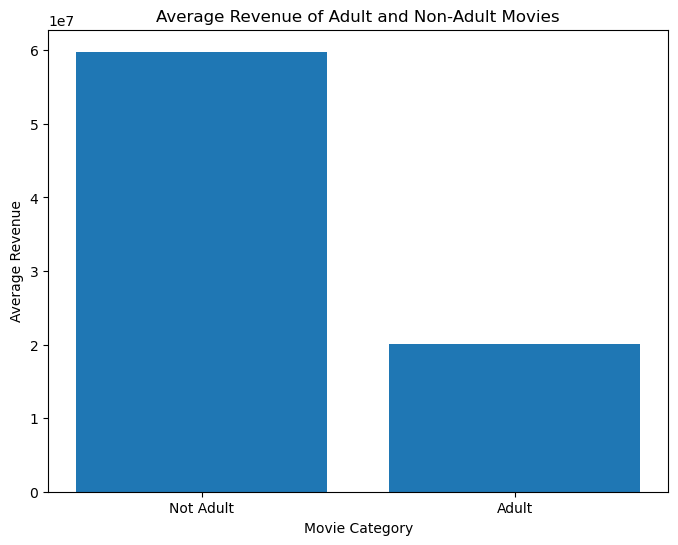

In [12]:
avg_rating_adult_false = df.loc[df['adult_False'] == 1, 'revenue'].mean()

# Calculate the average rating for movies with 'adult_True' == 1
avg_rating_adult_true = df.loc[df['adult_True'] == 1, 'revenue'].mean()

# Create a bar plot
categories = ['Not Adult', 'Adult']
ratings = [avg_rating_adult_false, avg_rating_adult_true]

plt.figure(figsize=(8, 6))
plt.bar(categories, ratings)
plt.xlabel('Movie Category')
plt.ylabel('Average Revenue')
plt.title('Average Revenue of Adult and Non-Adult Movies')


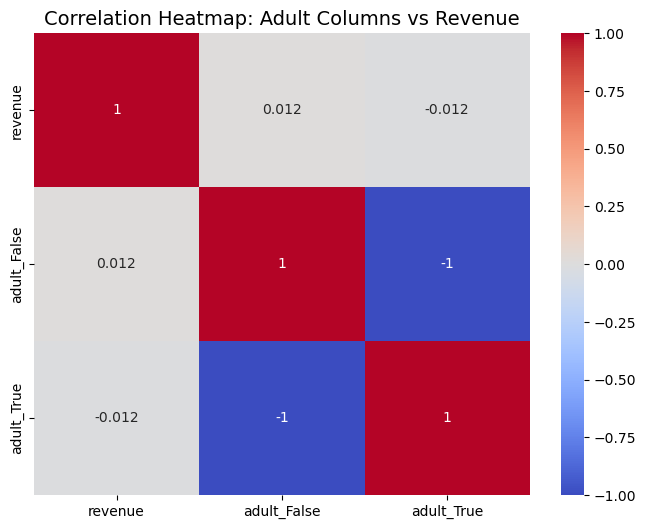

In [7]:
# Create a new DataFrame with the relevant columns
df1 = df[['revenue', 'adult_False', 'adult_True']]

# Calculate the correlation matrix
corr_matrix = df1.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Adult Columns vs Revenue', fontsize=14)
plt.show()

Negligible correlation between the categories and revenue. 

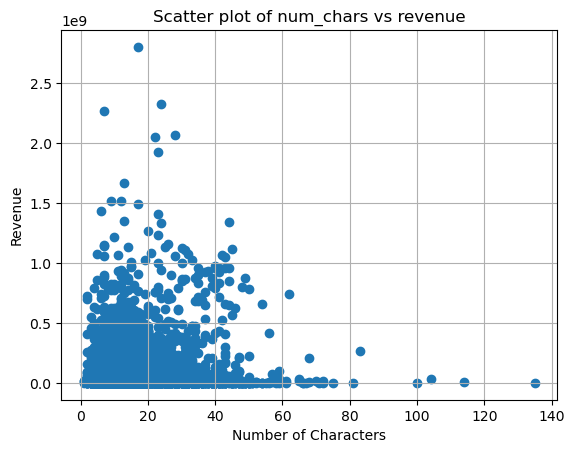

Correlation between 'num_chars' and 'revenue': 0.08210041332788238


In [8]:
plt.scatter(df['num_chars'], df['revenue'])
plt.title('Scatter plot of num_chars vs revenue')
plt.xlabel('Number of Characters')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

correlation = df['num_chars'].corr(df['revenue'])

print("Correlation between 'num_chars' and 'revenue':", correlation)

In [9]:
# Define a function to remove outliers based on z-score
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    df_filtered = df[z_scores < threshold]
    return df_filtered

# Remove outliers from 'num_chars' column using z-score with a threshold of 3
df_filtered = remove_outliers_zscore(df, 'num_chars', threshold=3)

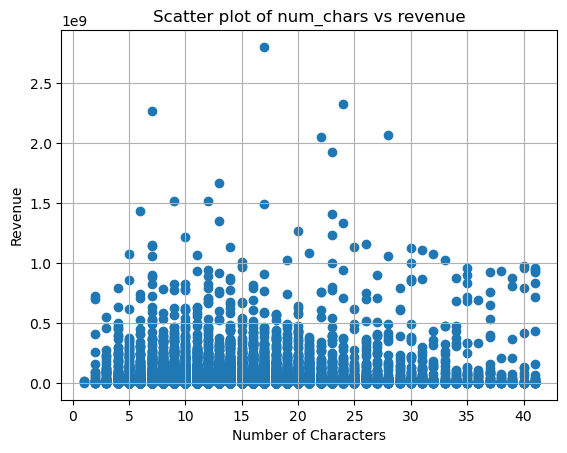

Correlation between 'num_chars' and 'revenue': 0.07337027333452396


In [10]:
plt.scatter(df_filtered['num_chars'], df_filtered['revenue'])
plt.title('Scatter plot of num_chars vs revenue')
plt.xlabel('Number of Characters')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

correlation = df_filtered['num_chars'].corr(df_filtered['revenue'])

print("Correlation between 'num_chars' and 'revenue':", correlation)

## Budget vs Revenue and Popularity vs Revenue

In [5]:
df = pd.read_csv('newest_dataf.csv')
df.head()

,Unnamed: 0,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,overview,popularity,poster_path,genres,keywords,release_year,num_chars
0,0,27205,Inception,8.364,34495,2010-07-15,825532764,148,False,160000000,en,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2010,9
1,1,157336,Interstellar,8.417,32571,2014-11-05,701729206,169,False,165000000,en,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2014,12
2,2,155,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,185000000,en,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2008,15
3,3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,en,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",2009,6
4,4,24428,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,220000000,en,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",2012,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9124 entries, 0 to 9123
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9124 non-null   int64  
 1   id                 9124 non-null   int64  
 2   title              9124 non-null   object 
 3   vote_average       9124 non-null   float64
 4   vote_count         9124 non-null   int64  
 5   release_date       9124 non-null   object 
 6   revenue            9124 non-null   int64  
 7   runtime            9124 non-null   int64  
 8   adult              9124 non-null   bool   
 9   budget             9124 non-null   int64  
 10  original_language  9124 non-null   object 
 11  overview           9124 non-null   object 
 12  popularity         9124 non-null   float64
 13  poster_path        9124 non-null   object 
 14  genres             9124 non-null   object 
 15  keywords           9124 non-null   object 
 16  release_year       9124 

In [7]:
numeric_data = pd.DataFrame(df[["budget", "revenue", "release_year", "popularity"]])
numeric_data.describe().round(2)

,budget,revenue,release_year,popularity
count,9.124000e+03,9.124000e+03,9124.00,9124.00
mean,2.546598e+07,7.235468e+07,2000.73,20.79
std,3.920094e+07,1.649293e+08,19.02,64.33
min,1.000000e+00,1.000000e+00,1913.00,0.00
25%,2.700000e+06,2.435143e+06,1993.00,8.27
50%,1.100000e+07,1.612206e+07,2006.00,13.94
75%,3.000000e+07,6.668014e+07,2014.00,21.67
max,4.600000e+08,3.000000e+09,2024.00,2994.36


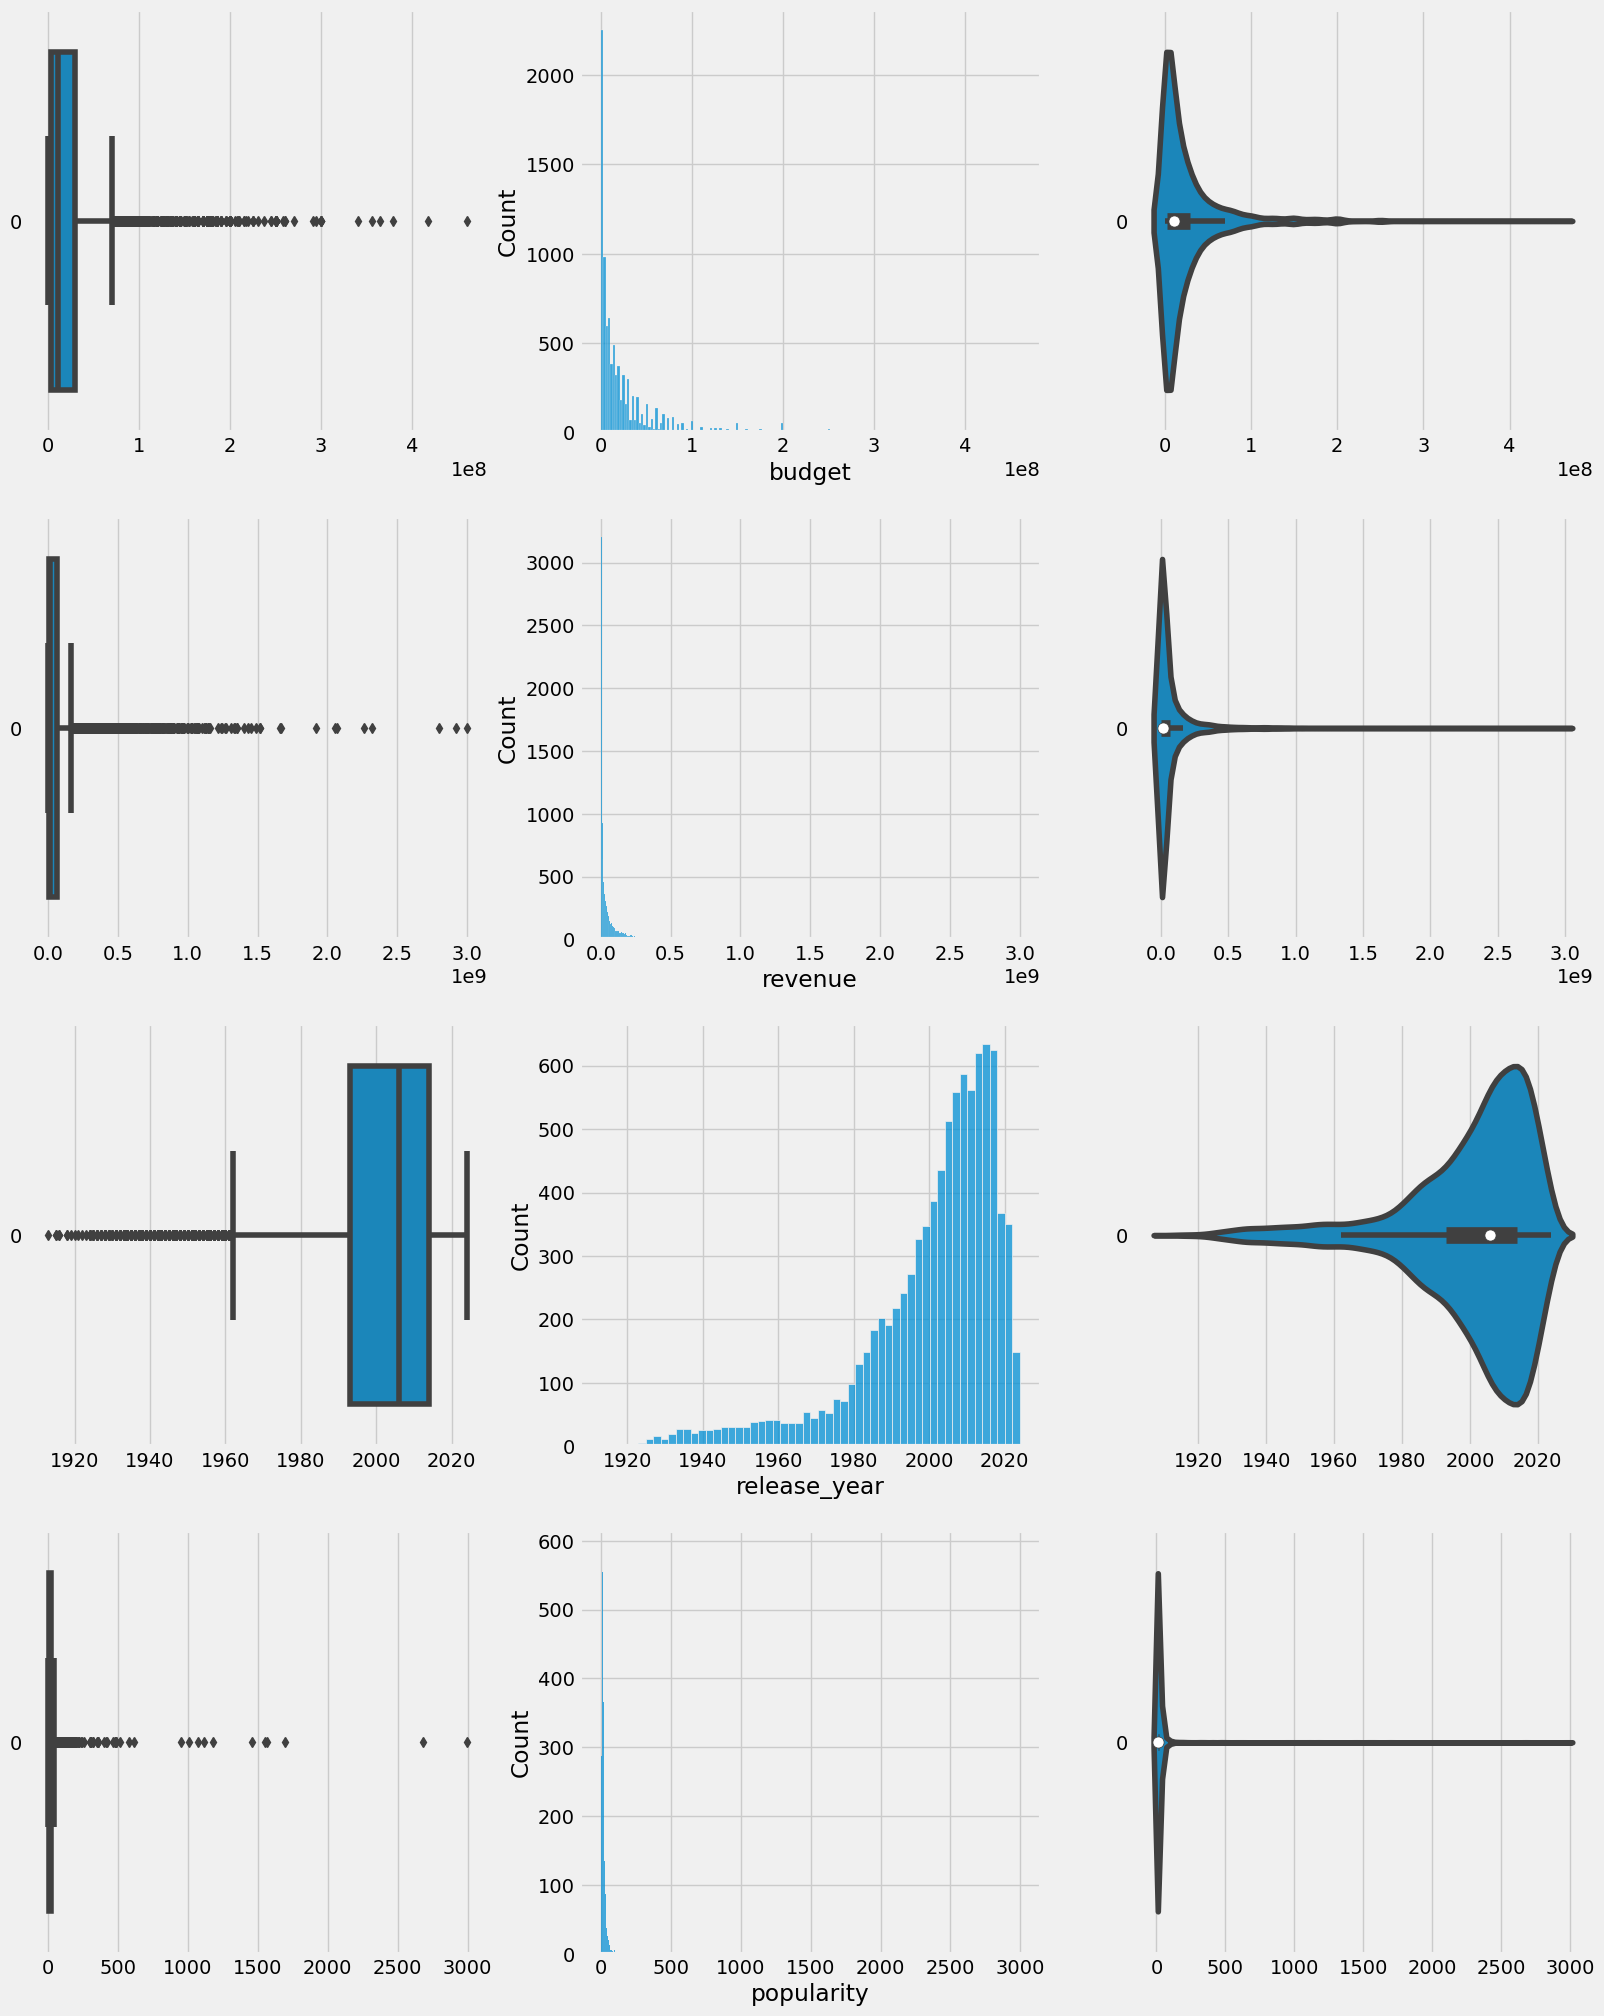

In [8]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

                budget   revenue  release_year  popularity
budget        1.000000  0.737016      0.225517    0.234873
revenue       0.737016  1.000000      0.144031    0.219513
release_year  0.225517  0.144031      1.000000    0.088763
popularity    0.234873  0.219513      0.088763    1.000000


<Axes: >

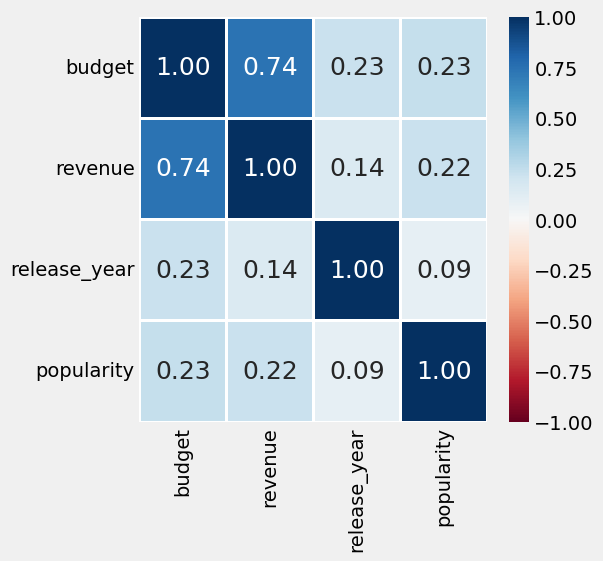

In [9]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(5, 5))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Budget and revenue have high correlation - postive relationship, rest of the factors have very low correlation.

## Removing outliers 

In [10]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

outlier = ((numeric_data < (Q1 - 1.5 * (Q3 - Q1))) | (numeric_data > (Q3 + 1.5 * (Q3 - Q1))))
outlier.sum()

budget           832
revenue         1076
release_year     532
popularity       636
dtype: int64

In [11]:
outlier

,budget,revenue,release_year,popularity
0,True,True,False,True
1,True,True,False,True
2,True,True,False,True
3,True,True,False,True
4,True,True,False,True
...,...,...,...,...
9119,False,False,False,False
9120,False,False,False,False
9121,False,False,False,False
9122,False,False,False,False


In [12]:
outliers = outlier.any(axis = 1)   # axis 0 is row, 1 is column
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
numeric_data.drop(axis=0, index=outlierindices, inplace=True)
numeric_data

,budget,revenue,release_year,popularity
139,9000000,39723096,2000,31.795
145,23000000,47351251,2013,37.608
148,1200000,2859750,1992,34.018
149,44000000,155760117,2015,32.119
157,30000000,152159461,2004,37.053
...,...,...,...,...
9119,100,100,2008,0.600
9120,100270,100270,1999,0.600
9121,500,20,2021,0.600
9122,15107,15107,1993,0.600


                budget   revenue  release_year  popularity
budget        1.000000  0.551957      0.042827    0.433691
revenue       0.551957  1.000000     -0.048449    0.535933
release_year  0.042827 -0.048449      1.000000   -0.126185
popularity    0.433691  0.535933     -0.126185    1.000000


<Axes: >

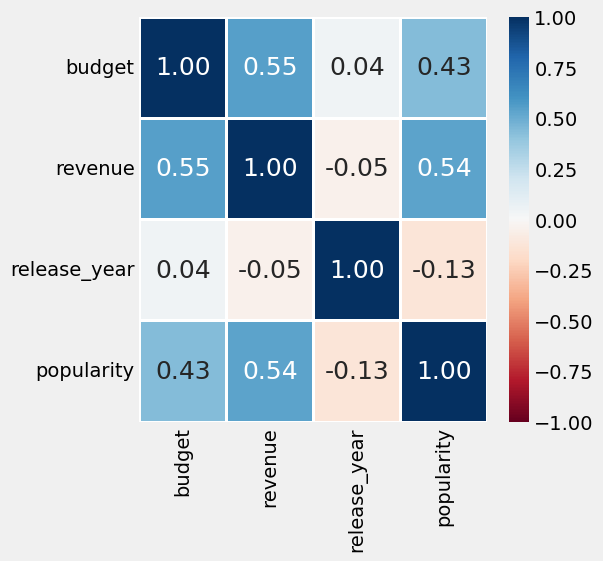

In [13]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(5, 5))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

After removing outliers, it is evident that both 'budget' and 'popularity' have a positive linear relationship with 'revenue' compared to the other variables. 

## Vote Count and Vote Average vs Revenue

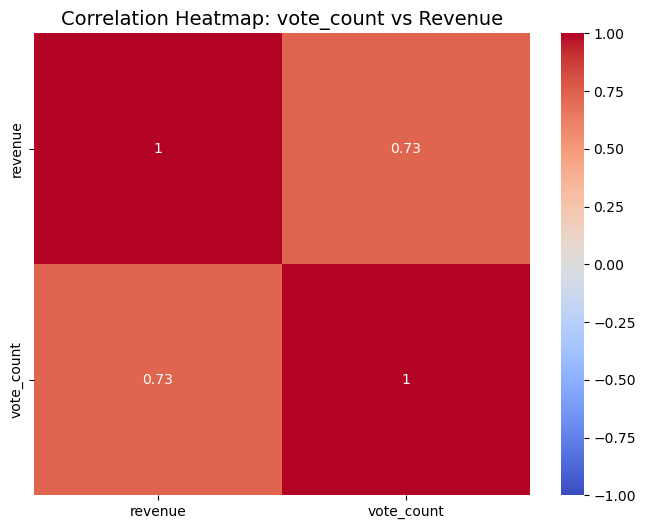

In [3]:
df1 = df[['revenue','vote_count']]

# Calculate the correlation matrix
corr_matrix = df1.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: vote_count vs Revenue', fontsize=14)
plt.show()

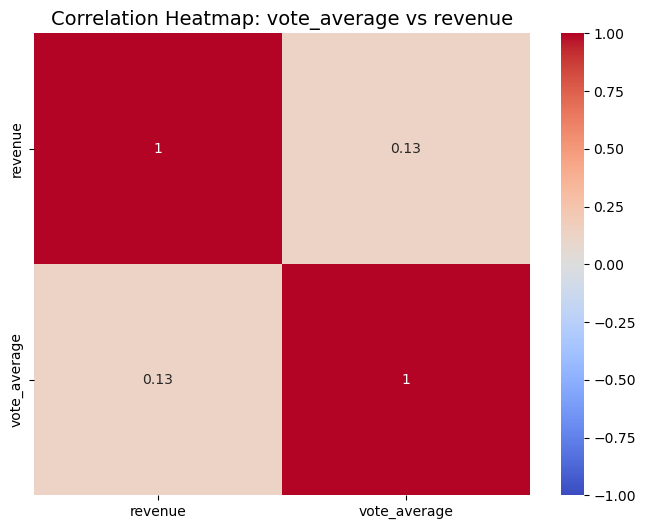

In [4]:
df2 = df[['revenue','vote_average']]

# Calculate the correlation matrix
corr_matrix = df2.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: vote_average vs revenue', fontsize=14)
plt.show()

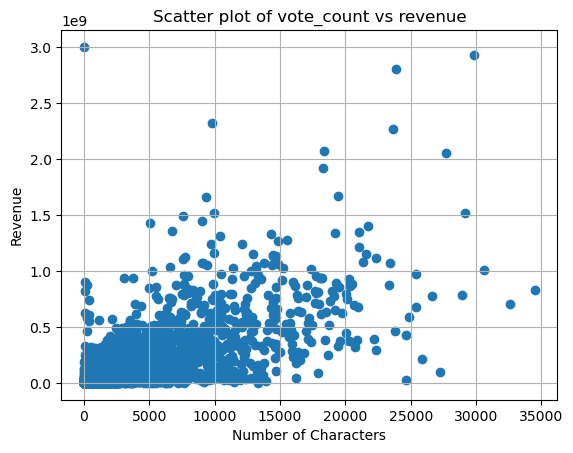

Correlation between 'vote_count' and 'revenue': 0.7341293999441836


In [5]:
plt.scatter(df['vote_count'], df['revenue'])
plt.title('Scatter plot of vote_count vs revenue')
plt.xlabel('Number of Characters')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

correlation = df['vote_count'].corr(df['revenue'])

print("Correlation between 'vote_count' and 'revenue':", correlation)

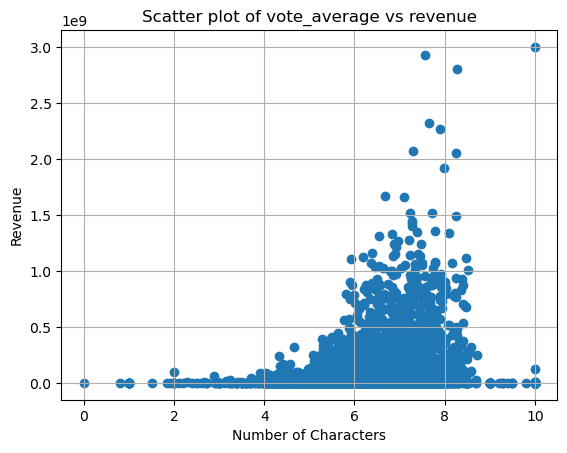

Correlation between 'vote_average' and 'revenue': 0.13274624658816417


In [6]:
plt.scatter(df['vote_average'], df['revenue'])
plt.title('Scatter plot of vote_average vs revenue')
plt.xlabel('Number of Characters')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

correlation = df['vote_average'].corr(df['revenue'])

print("Correlation between 'vote_average' and 'revenue':", correlation)

It is evident that between 'vote_count' and 'vote_average', 'vote_count' has a strong positive correlation of 0.73 which will be taken into consideration. 